# Model fitting

This notebook contains another solution to the model fitting assignment, incorporating a number of useful python features, as well as some more advanced visualizations.  If there's any code in here that you don't understand how to unpack, then ask!  (Check especially lines commented with `# ***`; chances are you will learn something new.)

## Define model and generate data

In [1]:
import numpy as np

def model(x, a, b):
    return a*x + b

a_true = 3
b_true = 4

def generate_data(a=a_true, b=b_true, N=20):
    x_obs = np.random.random(20) * 40
    y_unc = np.random.random(20) * 20
    y_obs = np.array([model(x, a, b) + np.random.randn() * sigma for x, sigma in zip(x_obs, y_unc)])  # ***
    return x_obs, y_obs, y_unc

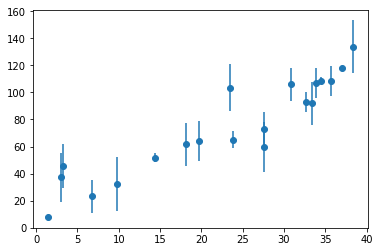

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

x, y, y_unc = generate_data()
plt.errorbar(x, y, y_unc, marker='o', ls='none');

## Objective function

In [3]:
def objective(pars, x_obs, y_obs, y_unc):
    """chi-squared objective function
    
    Parameters
    ----------
    pars : list-like
        Parameter vector (a, b)
        
    x_obs, y_obs, y_unc : np.ndarray
        Numpy arrays of x data, y data, and uncertainty.
        Must be same length.
    """
    a, b = pars
    y_mod = model(x_obs, a, b)
    return ((y_obs - y_mod)**2 / y_unc**2).sum()

objective?

Signature: objective(pars, x_obs, y_obs, y_unc)
Docstring:
chi-squared objective function

Parameters
----------
pars : list-like
    Parameter vector (a, b)
    
x_obs, y_obs, y_unc : np.ndarray
    Numpy arrays of x data, y data, and uncertainty.
    Must be same length.
File:      ~/repositories/hackspace/notebooks/<ipython-input-3-27ef65d19067>
Type:      function


In [4]:
objective([3, 4], x, y, y_unc), objective((1, 5), x, y, y_unc)

(22.10708984518107, 2620.254046357662)

## Optimize objective function

In [5]:
from scipy.optimize import minimize

result = minimize(objective, (0, 0), args=(x, y, y_unc))
result

      fun: 20.977662955755605
 hess_inv: array([[ 0.00118502, -0.01234944],
       [-0.01234944,  0.3730299 ]])
      jac: array([-2.38418579e-07, -2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 28
      nit: 5
     njev: 7
   status: 0
  success: True
        x: array([3.0468218 , 3.82812214])

## Visualize data, model, and residuals with matplotlib

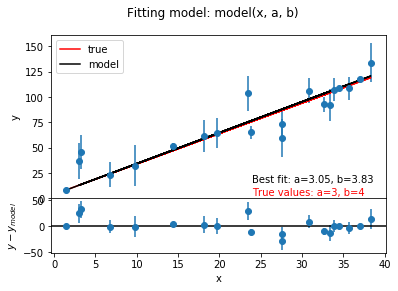

In [6]:
fig, axes = plt.subplots(2, 1, sharex=True, gridspec_kw=dict(height_ratios=(3, 1), hspace=0))  # ***

y_true = model(x, a_true, b_true)
y_model = model(x, *result.x)  # ***

# Plot points
axes[0].errorbar(x, y, y_unc, ls='none', marker='o')
axes[0].plot(x, y_true, color='r', label='true')
axes[0].plot(x, y_model, color='k', label='model')
axes[0].set_ylabel('y')
axes[0].legend()
axes[0].annotate(f'Best fit: a={result.x[0]:0.2f}, b={result.x[1]:0.2f}', 
                 xy=(0.6, 0.1), xycoords='axes fraction')  # ***
axes[0].annotate(f'True values: a={a_true}, b={b_true}',
                 xy=(0.6, 0.02), xycoords='axes fraction', color='r')

# Plot residuals
axes[1].errorbar(x, y - y_model, y_unc, marker='o', ls='none')
axes[1].axhline(0, color='k')
axes[1].set_xlabel('x')
axes[1].set_ylabel('$y - y_{model}$')


import inspect
fig.suptitle(f'Fitting model: {model.__name__}{inspect.signature(model)}');  # ***

## Visualizing parameter space with matplotlib

[3.04522613] [3.89949749]


Text(0.5, 1.0, 'Objective function values over parameter space')

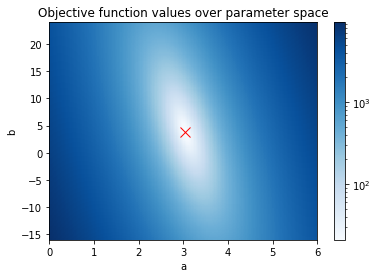

In [7]:
from matplotlib import colors

resolution = 200
a_grid = np.linspace(a_true - 3, a_true + 3, resolution)
b_grid = np.linspace(b_true - 20, b_true + 20, resolution)
a_mesh, b_mesh = np.meshgrid(a_grid, b_grid)  # ***
objective_mesh = np.array([objective((a, b), x, y, y_unc) for a, b in zip(a_mesh.ravel(), b_mesh.ravel())])  # ***
objective_mesh = objective_mesh.reshape(a_mesh.shape)

b_ind, a_ind = np.where(objective_mesh == objective_mesh.min())  # ***
a_min, b_min = a_grid[a_ind], b_grid[b_ind]
print(a_min, b_min)

plt.pcolormesh(a_mesh, b_mesh, objective_mesh, cmap="Blues", norm=colors.LogNorm(vmin=objective_mesh.min(),
                                                                                 vmax=objective_mesh.max()))
plt.xlabel('a')
plt.ylabel('b')
plt.plot(a_min, b_min, marker='x', ms=10, color='r')
plt.colorbar()
plt.title('Objective function values over parameter space')

## Interactive exploration of parameter space using HoloViews

See [holoviews documentation](holoviews.org) to learn more about how to make interactive visualizations like this!

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
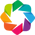

:Layout
   .DynamicMap.I  :DynamicMap   []
      :Overlay
         .QuadMesh.I :QuadMesh   [a,b]   (z)
         .Points.I   :Points   [a,b]
         .Points.II  :Points   [a,b]
   .DynamicMap.II :DynamicMap   []
      :Overlay
         .Points.I    :Points   [x,y]
         .ErrorBars.I :ErrorBars   [x]   (y,yerror)
         .Curve.I     :Curve   [x]   (y)

In [8]:
import holoviews as hv
hv.extension('bokeh')

obj_mesh = hv.QuadMesh((a_grid, b_grid, np.log10(objective_mesh)), ['a', 'b']).opts(cmap='blues')
tap_ab = hv.streams.Tap(source=obj_mesh, x=a_true, y=b_true).rename(x='a', y='b')

def plot_data(a, b):
    pts = hv.Points(np.array([x, y]).T).opts(size=5, color='black')
    errs = hv.ErrorBars(np.array([x, y, y_unc]).T).opts(line_color='black')
    model_curve = hv.Curve(np.array([x, model(x, a, b)]).T).opts(color='r')
    chisq = objective((a, b), x, y, y_unc)
    return (pts * errs * model_curve).opts(title=f'a={a:0.2f}, b={b:0.2f}, chisq={chisq:0.1f}')

def plot_params(a, b):
    true_ab_point = hv.Points([[a_true, b_true]], ['a', 'b']).opts(marker='x', color='k', size=10)
    ab_point = hv.Points([[a, b]], ['a', 'b']).opts(marker='x', color='r', size=10)
    mesh = obj_mesh * ab_point
    
    return obj_mesh * true_ab_point * ab_point # + pts * errs


params_dmap = hv.DynamicMap(plot_params, streams=[tap_ab])
data_dmap = hv.DynamicMap(plot_data, streams=[tap_ab])

params_dmap + data_dmap

## Sampling posterior with MCMC

Note that this toy problem has 2 parameters we are trying to determine: $a$ and $b$.  We are able to get a good map of this parameter space with a grid of 200 points in each direction.  You can imagine though, that with even as few as 4 parameters, mapping out the parameter space at the same resolution would require ~$10^9$ computations and require > 1 Gb of RAM to store.  5 parameters, and you're totally sunk.

Fortunately, people have thought of ways around this---ways to *sample* a parameter space in a clever manner: for instance, Markov-Chain Monte Carlo.

First, we need to define the probability distribution we are sampling: in this case, the posterior probability density function of the parameters, given the data.  In the special case of flat priors (which we will now adopt, for simplicity), this is just the negative of the objective function we were trying to minimize above.

In [58]:
def log_prob(pars, x_obs, y_obs, y_unc):
    return -0.5 * objective(pars, x_obs, y_obs, y_unc)

Here, we now demonstrate simple usage of one of the many MCMC packages out there.

In [59]:
ndim = 2
nwalkers = 32

p0 = np.random.rand(nwalkers, ndim)  # initial guess for each of the walkers

import emcee

sampler = emcee.EnsembleSampler(nwalkers, ndim, log_prob, args=[x, y, y_unc])

Check that the log-probability returns a finite value with the initial guess & arguments provided:

In [60]:
log_prob(p0[0], x, y, y_unc)

-1525.8839126605487

Run a few "burn-in" steps:

In [61]:
state = sampler.run_mcmc(p0, 100)
sampler.reset()

In [62]:
sampler.run_mcmc(state, 1000);

In [63]:
samples = sampler.get_chain(flat=True)

View the results:

In [64]:
samples.shape

(32000, 2)

You can see the distribution of each parameter from this chain by plotting histograms:

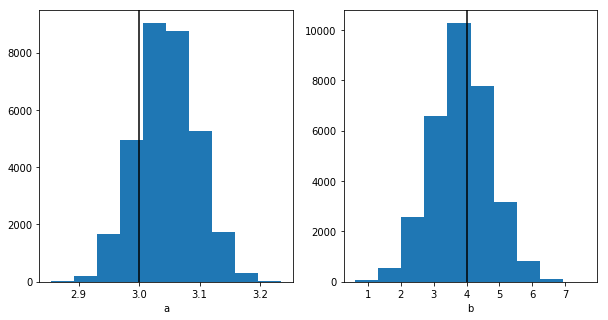

In [65]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].hist(samples[:, 0])
axes[0].set_xlabel('a')
axes[0].axvline(a_true, color='k')
axes[1].hist(samples[:, 1])
axes[1].set_xlabel('b');
axes[1].axvline(b_true, color='k')

A popular way to visualize the whole distribution is with the *corner* package (`pip install corner`):

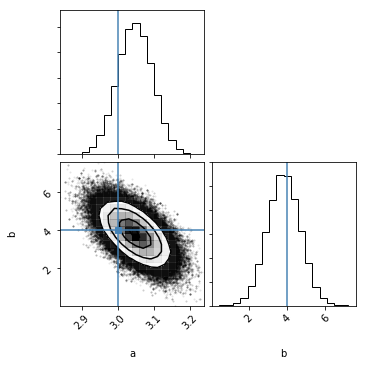

In [22]:
from corner import corner

corner(samples, labels=['a', 'b'], truths=[a_true, b_true]);

Or, you can make an interactive version with holoviews (down-sampling the points by a facor of 10 for ease of viewing):

In [39]:
pts = hv.Points(samples[::10, :], kdims=['a', 'b'])
pts.hist(dimension=['a', 'b'])

:AdjointLayout
   :Points   [a,b]
   :Histogram   [b]   (b_frequency)
   :Histogram   [a]   (a_frequency)

And then, we can see what these samples look like in data space, by evaluating the model at a number of these sample points:

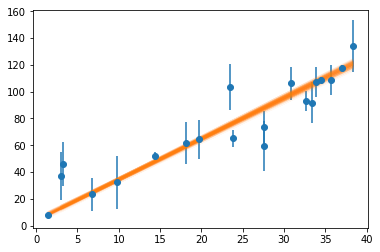

In [57]:
plt.errorbar(x, y, y_unc, ls='none', marker='o')

# overplot draws from the posterior
inds = np.random.randint(len(samples), size=100)
for ind in inds:
    sample = samples[ind]
    plt.plot(x, model(x, sample[0], sample[1]), "C1", alpha=0.05)